# Analysing Data

In [1]:
import pandas as pd

metad = pd.read_csv("data/HAM10000_metadata.csv")
metad

L8 = pd.read_csv("data/hmnist_8_8_L.csv")
RGB8 = pd.read_csv("data/hmnist_8_8_RGB.csv")
L28 = pd.read_csv("data/hmnist_28_28_L.csv")
RGB28 = pd.read_csv("data/hmnist_28_28_L.csv") 


metad.groupby("dx").count()
metad.groupby('lesion_id').count()
dupless = metad.drop_duplicates(subset=['lesion_id'])


metad= dupless.sort_values('lesion_id').reset_index(drop=True)

In [2]:
tags = metad.dx.unique().tolist()
tags

['nv', 'bkl', 'mel', 'akiec', 'bcc', 'df', 'vasc']

In [3]:
metad

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000000,ISIC_0028498,nv,histo,60.0,male,back
1,HAM_0000001,ISIC_0027859,bkl,histo,70.0,female,face
2,HAM_0000002,ISIC_0033848,mel,histo,65.0,female,lower extremity
3,HAM_0000003,ISIC_0027886,nv,follow_up,55.0,male,trunk
4,HAM_0000004,ISIC_0024645,nv,follow_up,40.0,female,back
...,...,...,...,...,...,...,...
7465,HAM_0007624,ISIC_0026322,nv,follow_up,60.0,male,trunk
7466,HAM_0007625,ISIC_0033736,bkl,histo,75.0,male,lower extremity
7467,HAM_0007626,ISIC_0031300,nv,follow_up,45.0,male,abdomen
7468,HAM_0007627,ISIC_0026118,bcc,histo,80.0,male,chest


In [4]:
_dict = metad.set_index('image_id').to_dict()['dx']
len(_dict)

7470

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


def preprocess(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)

    return img

In [6]:
_dir = "data/HAM10000_images/"
ext = ".jpg"

all_images = []
categories = []

for key, value in _dict.items():
    #load image
    all_images.append(preprocess(_dir + key + ext))
    categories.append(value)

    #all_images.append(images)

all_images
tags

['nv', 'bkl', 'mel', 'akiec', 'bcc', 'df', 'vasc']

In [7]:
for i in range(len(all_images)):
    print(f"{tags[i]} size = {len(all_images[i])}")

nv size = 1
bkl size = 1
mel size = 1
akiec size = 1
bcc size = 1
df size = 1
vasc size = 1


IndexError: list index out of range

In [ ]:
categories

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

lbl = LabelEncoder()
int_enc = lbl.fit_transform(categories)

print(int_enc)


onehot_encoder = OneHotEncoder(sparse=False)
int_enc = int_enc.reshape(len(int_enc), 1)
onehot_encoded = onehot_encoder.fit_transform(int_enc)
print(onehot_encoded)


[5 2 4 ... 5 1 5]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
bkl_ids = []
nv_ids = []
df_ids = []
mel_ids = []
vasc_ids = []
bcc_ids = []
akiec_ids = []

super_list = [bkl_ids,
              nv_ids,
              df_ids,
              mel_ids,
              vasc_ids,
              bcc_ids,
              akiec_ids]


for i in range(len(tags)):
    super_list[i] = (metad[metad['dx'] == tags[i]]['image_id'].values.tolist())

In [10]:
super_list

[['ISIC_0028498',
  'ISIC_0027886',
  'ISIC_0024645',
  'ISIC_0033879',
  'ISIC_0029868',
  'ISIC_0027730',
  'ISIC_0024678',
  'ISIC_0030085',
  'ISIC_0024655',
  'ISIC_0025759',
  'ISIC_0031453',
  'ISIC_0029142',
  'ISIC_0025894',
  'ISIC_0032122',
  'ISIC_0025396',
  'ISIC_0026773',
  'ISIC_0026144',
  'ISIC_0024349',
  'ISIC_0029325',
  'ISIC_0030509',
  'ISIC_0026012',
  'ISIC_0026815',
  'ISIC_0031383',
  'ISIC_0028177',
  'ISIC_0032291',
  'ISIC_0031861',
  'ISIC_0032411',
  'ISIC_0028039',
  'ISIC_0024812',
  'ISIC_0027391',
  'ISIC_0026057',
  'ISIC_0026103',
  'ISIC_0032211',
  'ISIC_0030152',
  'ISIC_0024798',
  'ISIC_0032126',
  'ISIC_0024631',
  'ISIC_0027810',
  'ISIC_0026342',
  'ISIC_0029890',
  'ISIC_0030376',
  'ISIC_0025795',
  'ISIC_0025725',
  'ISIC_0026391',
  'ISIC_0030302',
  'ISIC_0028417',
  'ISIC_0031306',
  'ISIC_0025014',
  'ISIC_0034153',
  'ISIC_0029045',
  'ISIC_0027933',
  'ISIC_0029299',
  'ISIC_0028461',
  'ISIC_0030817',
  'ISIC_0024939',
  'ISIC_00

In [11]:
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def get_preprocessed_images(images_ids: list, image_size: tuple) -> list:
    images = []
    dir1 = "data/HAM10000_images/"
    dir2 = "data/HAM10000_images_part_2/"
    ext = ".jpg"
    for _id in images_ids:
        try:
            img = image.load_img(dir1+_id+ext, target_size=image_size)
            img = image.img_to_array(img)
            img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
            img = preprocess_input(img)
            images.append(img)
        except:
            try:
                #continue
                img = image.load_img(dir2+_id+ext, target_size=image_size)
                img = image.img_to_array(img)
                img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
                img = preprocess_input(img)
                images.append(img)
            except:
                print(dir1 + _id)
                print(dir2 + _id)
                print("WOW")
            
            
    return np.vstack(images)

In [12]:
# Import the keras preprocessing method.
from tensorflow.keras.preprocessing import image
image_size = (224, 224)
# Load your images and preprocess them.

bkl_images = get_preprocessed_images(super_list[0],image_size)
print("Done 0" )
nv_images = get_preprocessed_images(super_list[1],image_size)
print("Done 1")
df_images = get_preprocessed_images(super_list[2],image_size)
print("Done 2")
mel_images = get_preprocessed_images(super_list[3],image_size)
print("Done 3")
vasc_images = get_preprocessed_images(super_list[4],image_size)
print("Done 4")
bcc_images = get_preprocessed_images(super_list[5],image_size)
print("Done 5")
akiec_images = get_preprocessed_images(super_list[6],image_size)
print("Done 6")


Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6


In [13]:
# Make a numpy array for each of the class labels (one hot encoded).
bkl_labels = np.tile([1, 0, 0, 0, 0, 0, 0], (bkl_images.shape[0], 1))
nv_labels = np.tile([0, 1, 0, 0, 0, 0, 0], (nv_images.shape[0], 1))
df_labels = np.tile([0, 0, 1, 0, 0, 0, 0], (df_images.shape[0], 1))
mel_labels = np.tile([0, 0, 0, 1, 0, 0, 0], (mel_images.shape[0], 1))
vasc_labels = np.tile([0, 0, 0, 0, 1, 0, 0], (vasc_images.shape[0], 1))
bcc_labels = np.tile([0, 0, 0, 0, 0, 1, 0], (bcc_images.shape[0], 1))
akiec_labels = np.tile([0, 0, 0, 0, 0, 0, 1], (akiec_images.shape[0], 1))

X = np.concatenate([bkl_images,
                    nv_images,
                    df_images,
                    mel_images,
                    vasc_images,
                    bcc_images,
                    akiec_images])

y = np.concatenate([bkl_labels,
                    nv_labels,
                    df_labels,
                    mel_labels,
                    vasc_labels,
                    bcc_labels,
                    akiec_labels])

print(X.shape, y.shape)


(7470, 224, 224, 3) (7470, 7)


In [ ]:
#_X = np.vstack(all_images)

print(_X[0])
print(X[0])

print(y[0])
print(onehot_encoded[0])

[[[ 0.05882359 -0.01960784 -0.01176471]
  [ 0.082353   -0.04313725 -0.04313725]
  [ 0.09803927 -0.02745098 -0.02745098]
  ...
  [-0.12156862 -0.24705881 -0.16862744]
  [-0.15294117 -0.27843136 -0.19999999]
  [-0.18431371 -0.34117645 -0.25490195]]

 [[ 0.06666672 -0.02745098 -0.01176471]
  [ 0.09019613 -0.03529412 -0.03529412]
  [ 0.10588241 -0.01960784 -0.01960784]
  ...
  [-0.11372548 -0.23921567 -0.1607843 ]
  [-0.14509803 -0.24705881 -0.17647058]
  [-0.16862744 -0.29411763 -0.21568626]]

 [[ 0.10588241 -0.00392157 -0.00392157]
  [ 0.082353   -0.02745098 -0.03529412]
  [ 0.09019613 -0.06666666 -0.05882353]
  ...
  [-0.11372548 -0.2235294  -0.12156862]
  [-0.12941176 -0.23921567 -0.1372549 ]
  [-0.14509803 -0.25490195 -0.15294117]]

 ...

 [[ 0.0196079  -0.1607843  -0.08235294]
  [ 0.03529418 -0.14509803 -0.06666666]
  [ 0.04313731 -0.1372549  -0.05882353]
  ...
  [-0.31764704 -0.42745095 -0.32549018]
  [-0.34117645 -0.45098037 -0.3490196 ]
  [-0.3490196  -0.4588235  -0.35686272]]

 [

In [14]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Determine the number of generated samples you want per original sample.
datagen_batch_size = 16

# Make a datagenerator object using ImageDataGenerator.
train_datagen = ImageDataGenerator(rotation_range=60,
                                    horizontal_flip=True)

# Feed the generator your train data.
train_generator = train_datagen.flow(X_train, y_train, batch_size=datagen_batch_size)

# Make a datagenerator object using ImageDataGenerator.
validation_datagen = ImageDataGenerator(rotation_range=60,
                                        horizontal_flip=True)

# Feed the generator your validation data.
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=datagen_batch_size)

In [16]:
# Import your chosen model!
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Make a model object. 
# Make sure you exclude the top part. set the input shape of the model to 224x224 pixels, with 3 color channels.
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the imported layers so they cannot be retrained.
for layer in model.layers:
    layer.trainable = False
    
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(7, activation='sigmoid'))

# Summarize.
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4014144   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 6,272,583
Trainable params: 4,014,599
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
# Compile and fit the model. Use the Adam optimizer and crossentropical loss. 
# Use the validation data argument during fitting to include your validation data.
new_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = new_model.fit(train_generator,
                        epochs=10, 
                        batch_size=500,
                        validation_data=validation_generator
                       )

Epoch 1/10
299/299 [==============================] - 96s 287ms/step - loss: 1.4638 - accuracy: 0.6931 - val_loss: 0.8345 - val_accuracy: 0.7182
Epoch 2/10
299/299 [==============================] - 90s 300ms/step - loss: 1.1299 - accuracy: 0.7234 - val_loss: 0.8284 - val_accuracy: 0.7174
Epoch 3/10
299/299 [==============================] - 96s 320ms/step - loss: 1.0285 - accuracy: 0.7230 - val_loss: 0.8182 - val_accuracy: 0.7182
Epoch 4/10
299/299 [==============================] - 91s 303ms/step - loss: 0.9655 - accuracy: 0.7230 - val_loss: 0.8139 - val_accuracy: 0.7174
Epoch 5/10
299/299 [==============================] - 100s 333ms/step - loss: 0.9299 - accuracy: 0.7222 - val_loss: 0.8064 - val_accuracy: 0.7174
Epoch 6/10
299/299 [==============================] - 92s 308ms/step - loss: 0.8840 - accuracy: 0.7232 - val_loss: 0.7645 - val_accuracy: 0.7174
Epoch 7/10
299/299 [==============================] - 93s 312ms/step - loss: 0.8543 - accuracy: 0.7232 - val_loss: 0.7754 - val_a

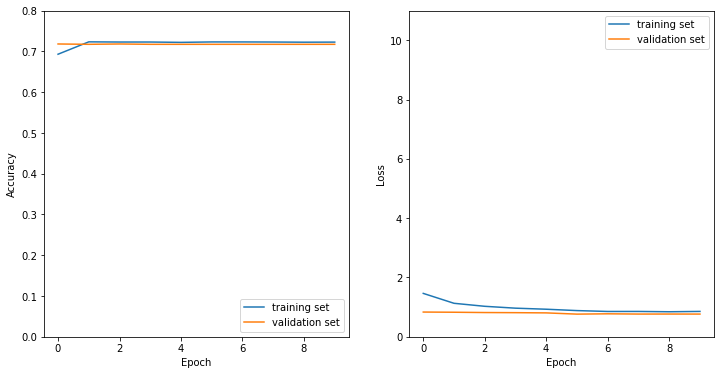

In [19]:
import tensorflow as tf
from matplotlib import pyplot as plt

def plot_history(history):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, .8])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 11])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='upper right')
    
plot_history(history)

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val)

print(y_val)
#cm = confusion_matrix(y_val,y_pred)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
#input random image
image_id = "ISIC_0029"

for i in range(len(tags)):
        print(f"{tags[i]},",end="")
print("REAL")

for i in range(306,500):
    real_id = image_id + str(i)
    
    filename = f"data/HAM10000_images_part_2/{real_id}.jpg"
    img = image.load_img(filename, target_size=image_size)
    img = image.img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)

    pred = new_model.predict(img)
    pred = pred.tolist()[0]
    S = sum(pred)
    pred = [round(x / S,2) for x in pred]
    for i in range(len(tags)):
        print(f"{pred[i]},",end="")
    print(metad[metad['image_id'] == real_id]['dx'].values[0])